In [92]:
import pandas as pd

In [93]:
df=pd.read_csv("sales.csv")
df

,City,Customer type,Gender,Product line,Offers,Tax 5%,Total,COGS,Payment,Rating
0,Hyderabad,Gold,Female,Health and Beauty,September,26.1415,548.9715,522.83,Ewallet,9.1
1,Mumbai,Normal,Female,Electronic Accessories,July,3.8200,80.2200,76.40,Cash,9.6
2,Delhi,Silver,Male,Home and Lifestyle,July,16.2155,340.5255,324.31,Credit card,7.4
3,Chennai,Platinum,Male,Health and Beauty,September,23.2880,489.0480,465.76,Ewallet,8.4
4,Chennai,Silver,Male,Sports and Travel,March,30.2085,634.3785,604.17,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...
94,Mumbai,NaN,NaN,Health and Beauty,September,4.4875,94.2375,89.75,Credit card,6.6
95,Delhi,Platinum,Male,Electronic Accessories,October,4.8580,102.0180,97.16,Ewallet,7.2
96,Bangalore,Gold,Male,Health and Beauty,September,43.9350,922.6350,878.70,Ewallet,5.1
97,Mumbai,Silver,Female,Electronic Accessories,November,3.7350,78.4350,74.70,Cash,4.1


In [94]:
df.mode()

,City,Customer type,Gender,Product line,Offers,Tax 5%,Total,COGS,Payment,Rating
0,Delhi,Silver,Female,Health and Beauty,March,9.0045,189.0945,180.09,Ewallet,6.6


In [95]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: bool

In [96]:
df.duplicated().sum()

0

in the dataset there are no duplicates.

In [97]:
df.isna().sum()

City             6
Customer type    7
Gender           8
Product line     5
Offers           5
Tax 5%           0
Total            0
COGS             0
Payment          5
Rating           5
dtype: int64

the following columns have null values

below is the percentage of the null values in each column

In [98]:
(df.isna().sum()/df.shape[0])*100

City             6.060606
Customer type    7.070707
Gender           8.080808
Product line     5.050505
Offers           5.050505
Tax 5%           0.000000
Total            0.000000
COGS             0.000000
Payment          5.050505
Rating           5.050505
dtype: float64

In [99]:
df1=df.dropna()

In [100]:
df1.fillna(df1.mean(numeric_only=True))
df1

,City,Customer type,Gender,Product line,Offers,Tax 5%,Total,COGS,Payment,Rating
0,Hyderabad,Gold,Female,Health and Beauty,September,26.1415,548.9715,522.83,Ewallet,9.1
1,Mumbai,Normal,Female,Electronic Accessories,July,3.8200,80.2200,76.40,Cash,9.6
2,Delhi,Silver,Male,Home and Lifestyle,July,16.2155,340.5255,324.31,Credit card,7.4
3,Chennai,Platinum,Male,Health and Beauty,September,23.2880,489.0480,465.76,Ewallet,8.4
4,Chennai,Silver,Male,Sports and Travel,March,30.2085,634.3785,604.17,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...
93,Bangalore,Silver,Male,Health and Beauty,September,28.9620,608.2020,579.24,Credit card,8.6
95,Delhi,Platinum,Male,Electronic Accessories,October,4.8580,102.0180,97.16,Ewallet,7.2
96,Bangalore,Gold,Male,Health and Beauty,September,43.9350,922.6350,878.70,Ewallet,5.1
97,Mumbai,Silver,Female,Electronic Accessories,November,3.7350,78.4350,74.70,Cash,4.1


In [101]:
mode_value = df['City'].mode()[0]
df['City'].fillna(mode_value, inplace=True)

In [102]:
mode_value = df['Customer type'].mode()[0]
df['Customer type'].fillna(mode_value, inplace=True)

In [103]:
mode_value = df['Gender'].mode()[0]
df['Gender'].fillna(mode_value, inplace=True)

In [104]:
mode_value = df['Product line'].mode()[0]
df['Product line'].fillna(mode_value, inplace=True)

In [105]:
mode_value = df['Offers'].mode()[0]
df['Offers'].fillna(mode_value, inplace=True)

In [106]:
mode_value = df['Payment'].mode()[0]
df['Payment'].fillna(mode_value, inplace=True)

In [107]:
df1.isna().sum()

City             0
Customer type    0
Gender           0
Product line     0
Offers           0
Tax 5%           0
Total            0
COGS             0
Payment          0
Rating           0
dtype: int64

In [108]:
df1.to_csv("cleaned.csv")

In [134]:
df2=pd.read_csv("cleaned.csv")

In [135]:
df2.isna().sum()

Unnamed: 0       0
City             0
Customer type    0
Gender           0
Product line     0
Offers           0
Tax 5%           0
Total            0
COGS             0
Payment          0
Rating           0
dtype: int64

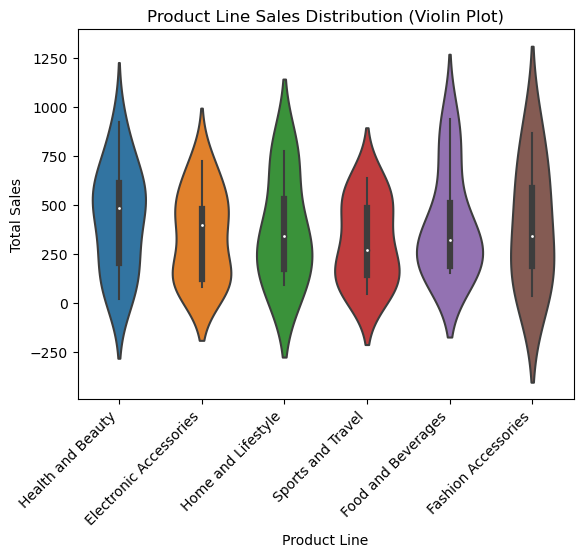

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
df2_encoded = df2.copy()

label_encoder = LabelEncoder()

df2_encoded['City'] = label_encoder.fit_transform(df2['City'])
df2_encoded['Customer type'] = label_encoder.fit_transform(df2['Customer type'])
df2_encoded['Gender'] = label_encoder.fit_transform(df2['Gender'])
df2_encoded['Product line'] = label_encoder.fit_transform(df2['Product line'])
df2_encoded['Payment'] = label_encoder.fit_transform(df2['Payment'])

# Mapping numerical labels back to categorical values
city_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
customer_type_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
gender_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
product_line_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
payment_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Update numerical labels with categorical values
df2_encoded['City'] = df2_encoded['City'].map(city_mapping)
df2_encoded['Customer type'] = df2_encoded['Customer type'].map(customer_type_mapping)
df2_encoded['Gender'] = df2_encoded['Gender'].map(gender_mapping)
df2_encoded['Product line'] = df2_encoded['Product line'].map(product_line_mapping)
df2_encoded['Payment'] = df2_encoded['Payment'].map(payment_mapping)

# Now you can use these mappings for plotting
import seaborn as sns

# Assuming you have a DataFrame named 'df' with columns 'Product line' and 'Total'
sns.violinplot(x='Product line', y='Total', data=df2)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Product Line Sales Distribution (Violin Plot)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



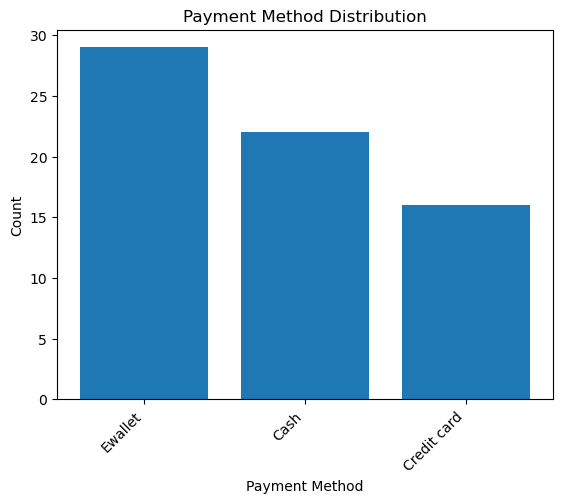

In [140]:
# Assuming you have a DataFrame named 'df' with the 'Payment' column
payment_distribution = df2['Payment'].value_counts()

plt.bar(payment_distribution.index, payment_distribution.values)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


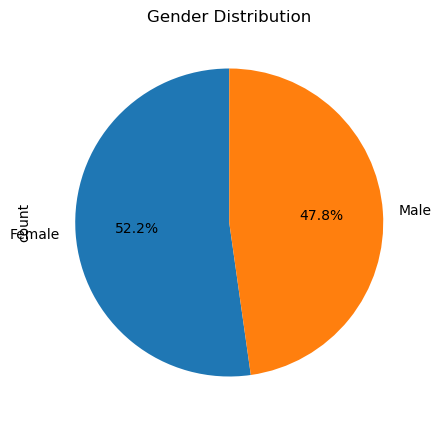

In [144]:
plt.figure(figsize=(8, 5))
df2['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

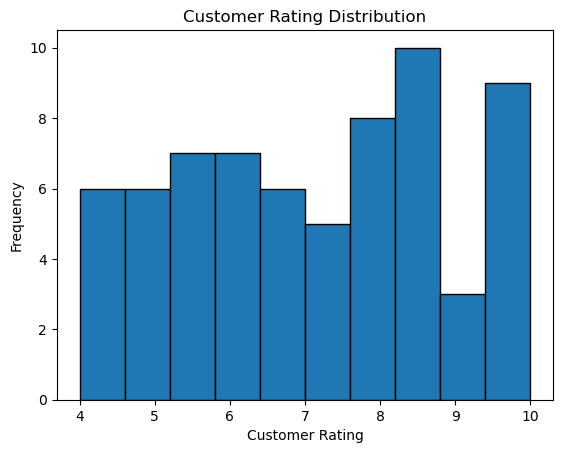

In [145]:
# Assuming you have a DataFrame named 'df' with the 'Rating' column
plt.hist(df2['Rating'], bins=10, edgecolor='black')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.title('Customer Rating Distribution')
plt.show()


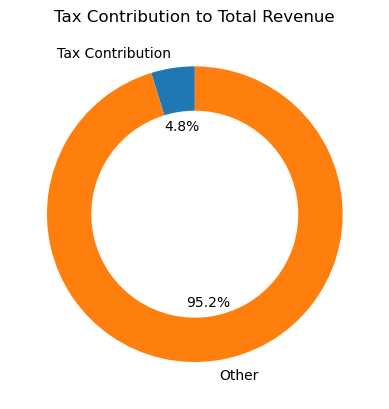

In [146]:
tax_contribution = df2['Tax 5%'].sum() / df2['Total'].sum()
plt.pie([tax_contribution, 1-tax_contribution], labels=['Tax Contribution', 'Other'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Tax Contribution to Total Revenue')
plt.show()

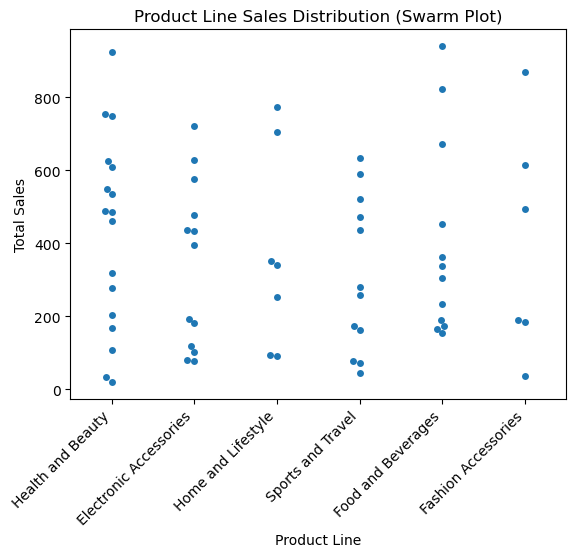

In [147]:
import seaborn as sns

# Assuming you have a DataFrame named 'df' with columns 'Product line' and 'Total'
sns.swarmplot(x='Product line', y='Total', data=df2)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Product Line Sales Distribution (Swarm Plot)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


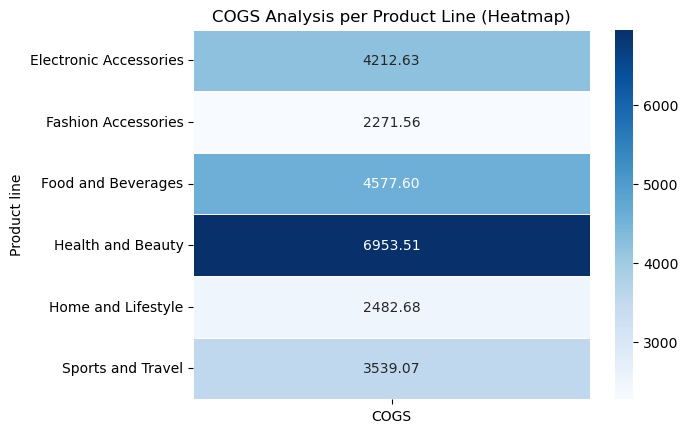

In [151]:
import seaborn as sns

# Assuming you have a DataFrame named 'df' with columns 'Product line' and 'cogs'
cogs_analysis = df2.groupby('Product line')['COGS'].sum().reset_index()

cogs_matrix = cogs_analysis.pivot_table(index='Product line', values='COGS', aggfunc='sum')
sns.heatmap(cogs_matrix, cmap='Blues', annot=True, fmt=".2f", linewidths=.5)
plt.title('COGS Analysis per Product Line (Heatmap)')
plt.show()


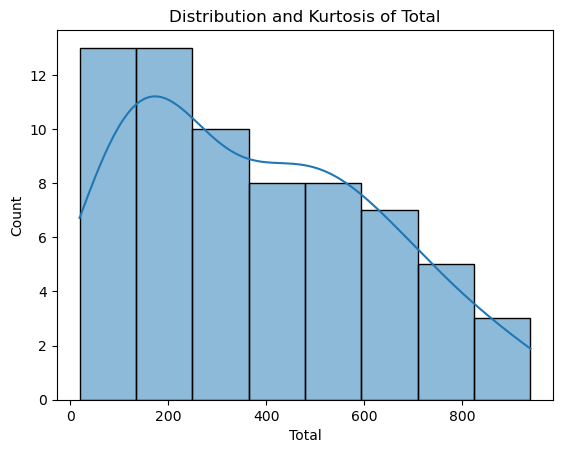

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Total' is a numerical column
sns.histplot(df2['Total'], kde=True)
plt.title('Distribution and Kurtosis of Total')
plt.show()

TypeError: tight_layout() takes 0 positional arguments but 1 was given

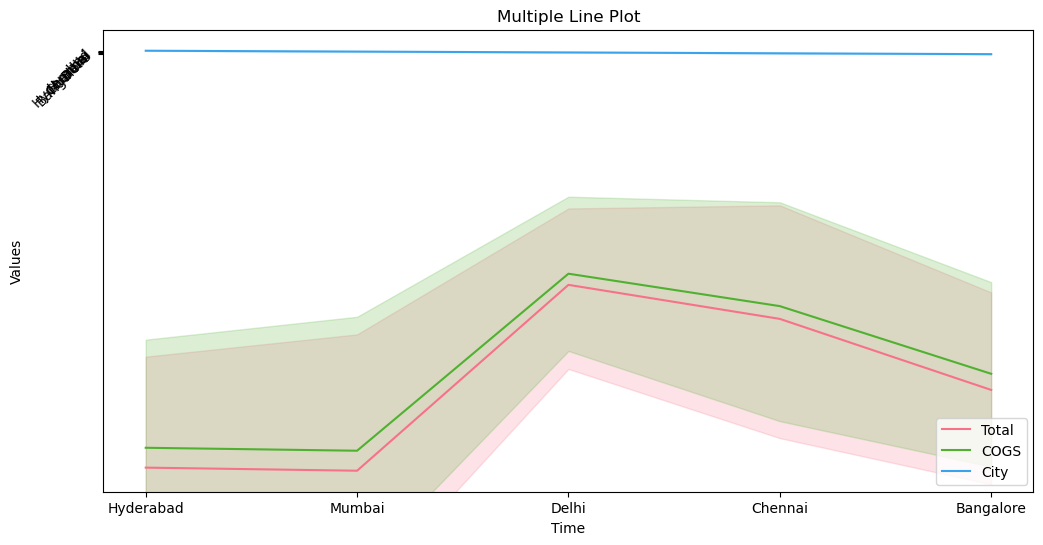

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with multiple numerical columns and a categorical variable (e.g., 'Time')
# Example columns: 'Total', 'COGS', 'Profit', etc.

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Specify numerical columns to plot
numerical_columns = ['Total', 'COGS', 'City']

# Choose a color palette (adjust as needed)
colors = sns.color_palette('husl', len(numerical_columns))

# Plot each numerical column as a separate line
for i, col in enumerate(numerical_columns):
    sns.lineplot(x='City', y=col, data=df2, label=col, color=colors[i], ax=ax)

# Customize the plot
ax.set_title('Multiple Line Plot')
ax.set_xlabel('Time')  # Replace with your actual x-axis label
ax.set_ylabel('Values')  # Replace with your actual y-axis label
ax.tick_params(axis='y', rotation=45)
ax.legend()
# Show the plot
plt.tight_layout()
plt.show()


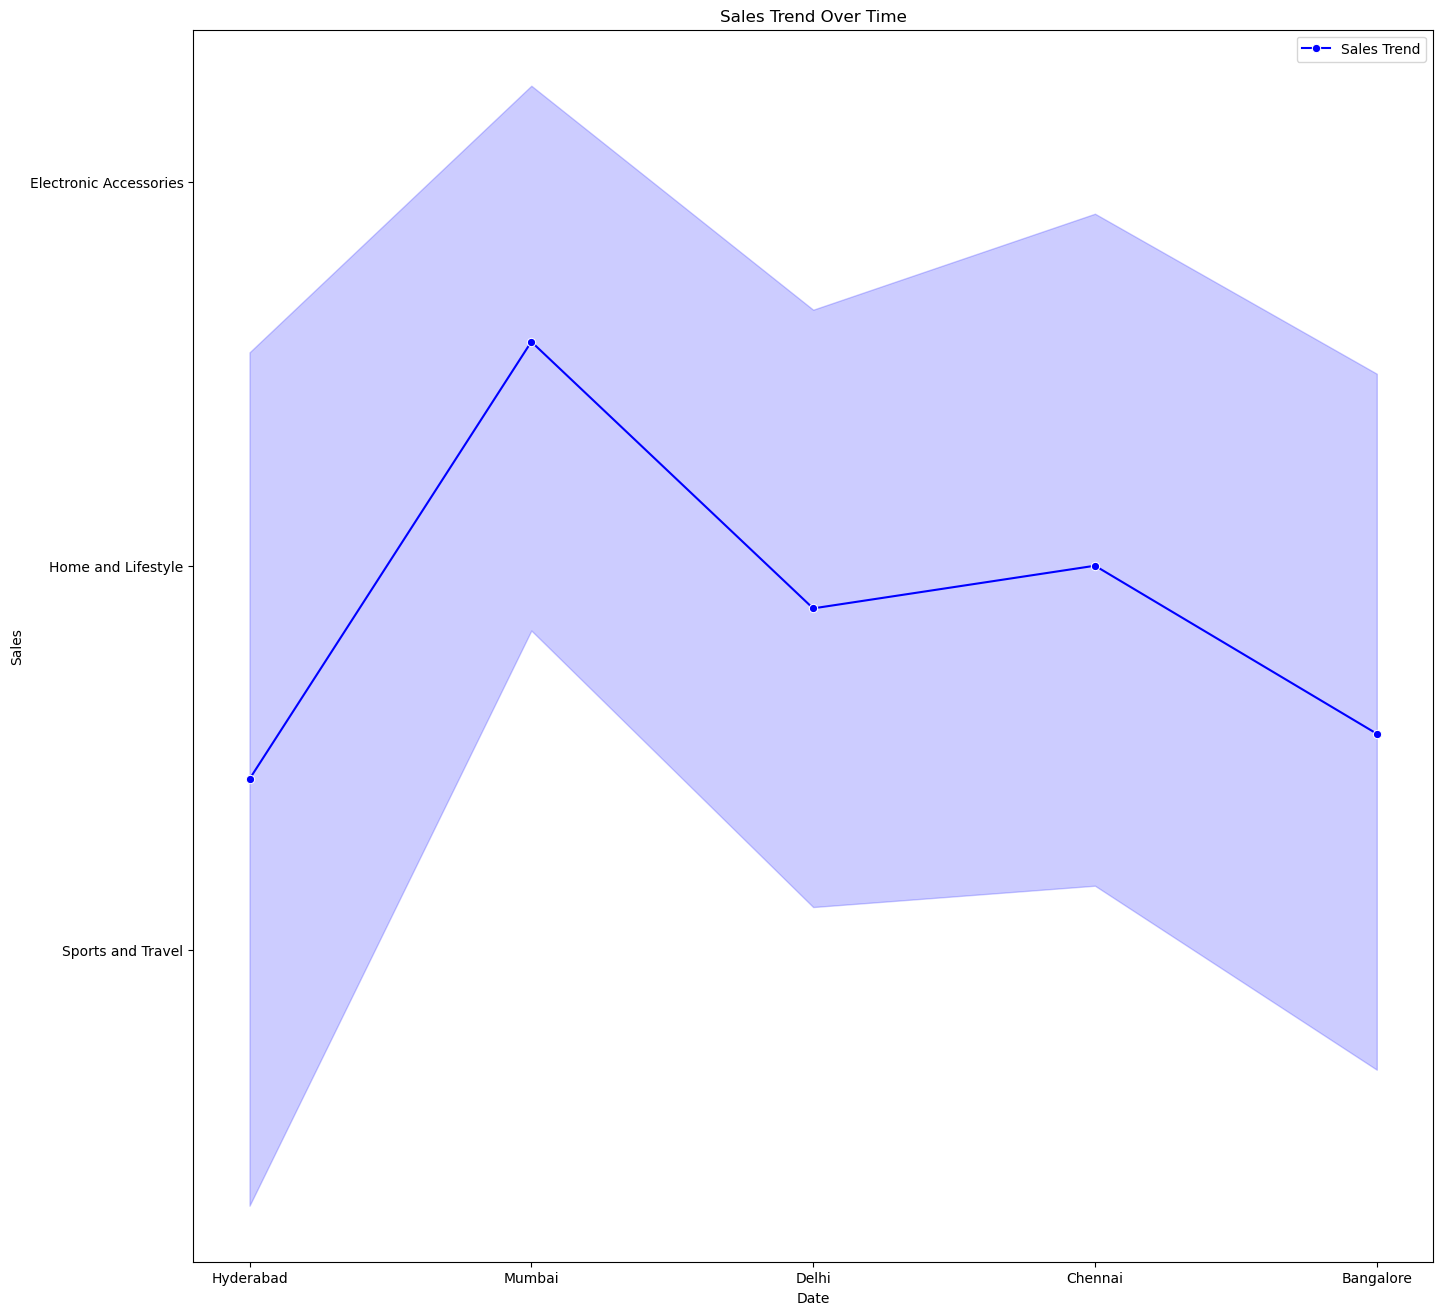

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'Date' and 'Sales' columns
# Make sure 'Date' column is in datetime format
#df[''] = pd.to_datetime(df['Date'])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(16, 16))

# Plot the line
sns.lineplot(x='City', y='Product line', data=df2, marker='o', color='blue', label='Sales Trend')

# Customize the plot
ax.set_title('Sales Trend Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.legend()

# Show the plot
plt.show()


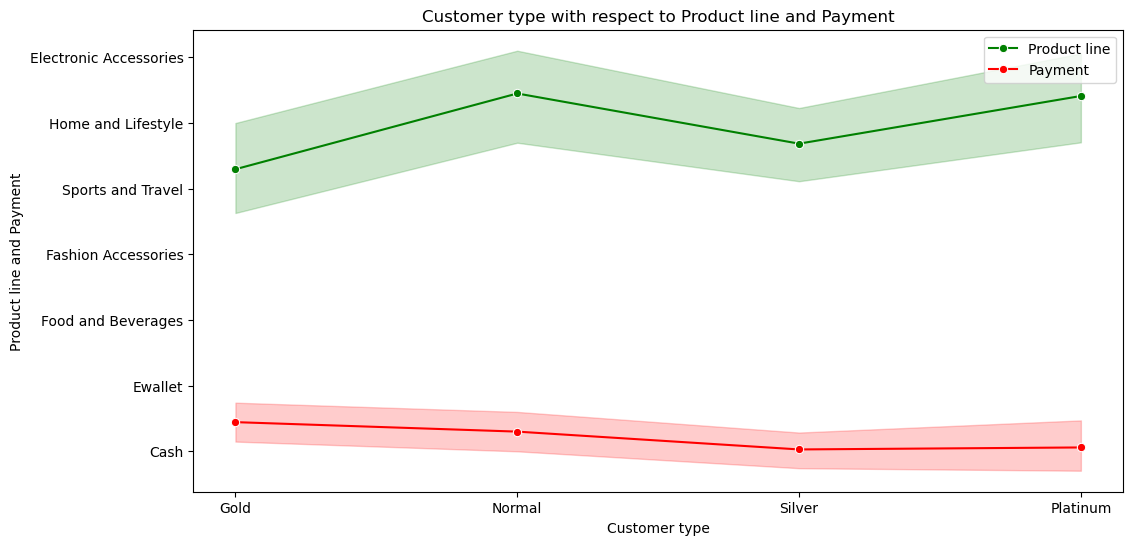

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='Customer type', y='Product line', data=df, marker='o', label='Product line', color='green')
sns.lineplot(x='Customer type', y='Payment', data=df, marker='o', label='Payment', color='red')
ax.set_title('Customer type with respect to Product line and Payment')
ax.set_xlabel('Customer type')
ax.set_ylabel('Product line and Payment')
ax.legend()
plt.show()

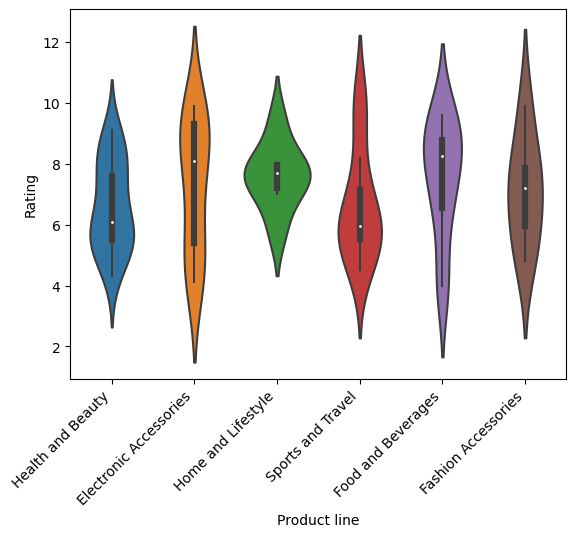

In [169]:
# Distribution of Ratings by Product Line
sns.violinplot(x='Product line', y='Rating', data=df2)
plt.xticks(rotation=45, ha='right') 
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10180\1751264427.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Rating', data=df2, ci=None)


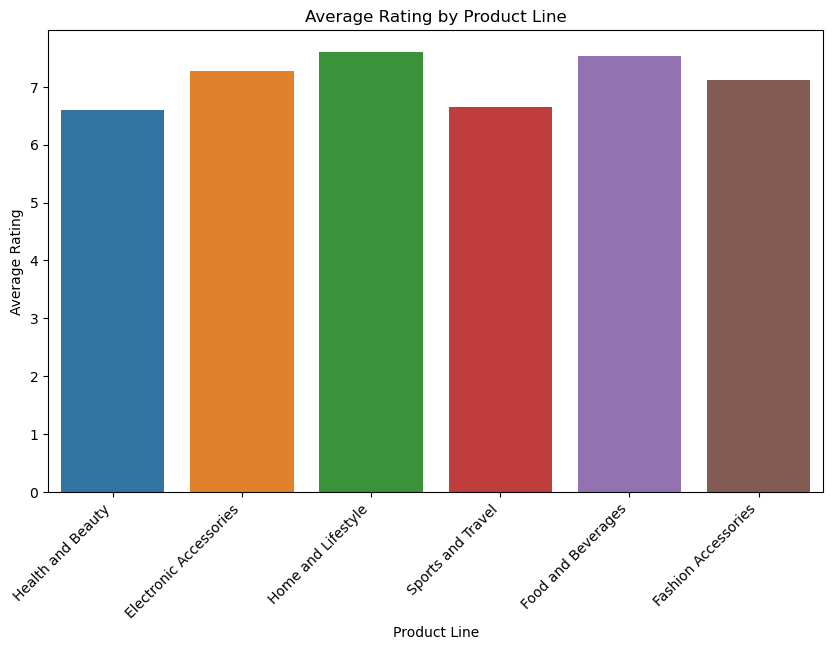

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Rating', data=df2, ci=None)
plt.title('Average Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right') 
plt.show()

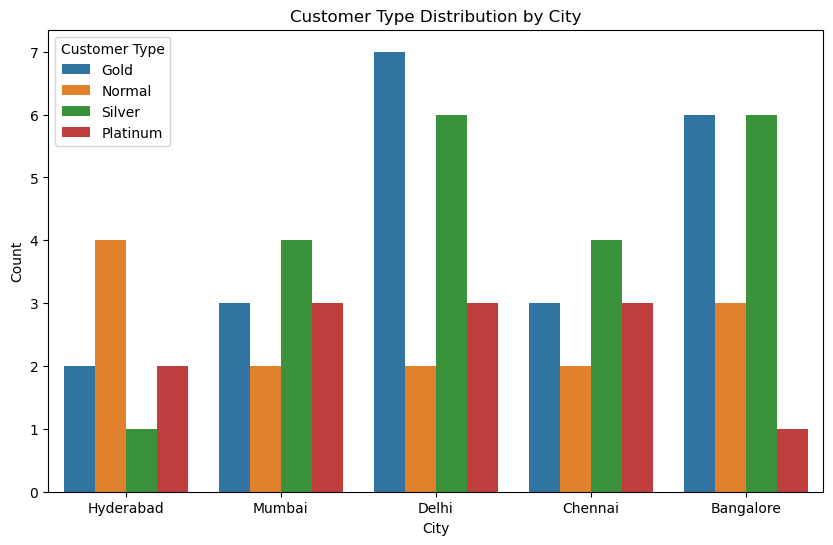

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'City' and 'Customer type' are columns in your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

plt.figure(figsize=(10, 6))
sns.countplot(x='City', hue='Customer type', data=df2)
plt.title('Customer Type Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()


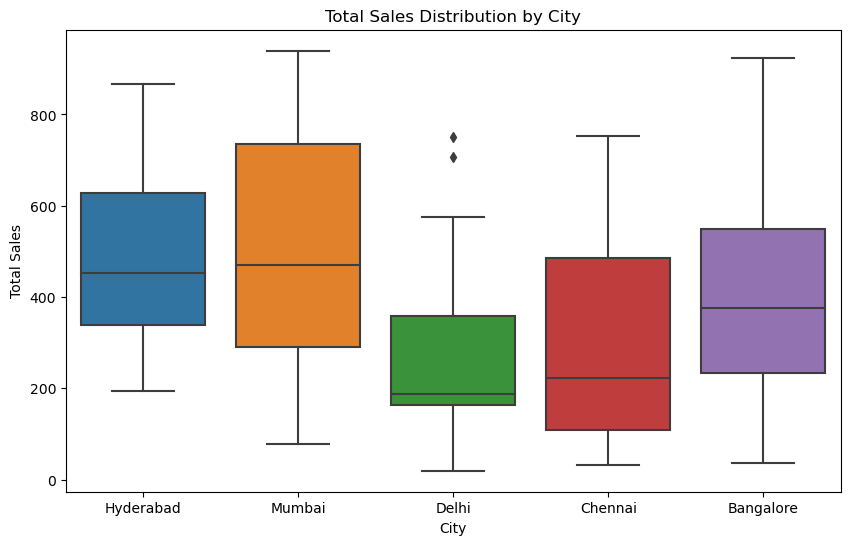

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'City' and 'Total' are columns in your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Total', data=df2)
plt.title('Total Sales Distribution by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()


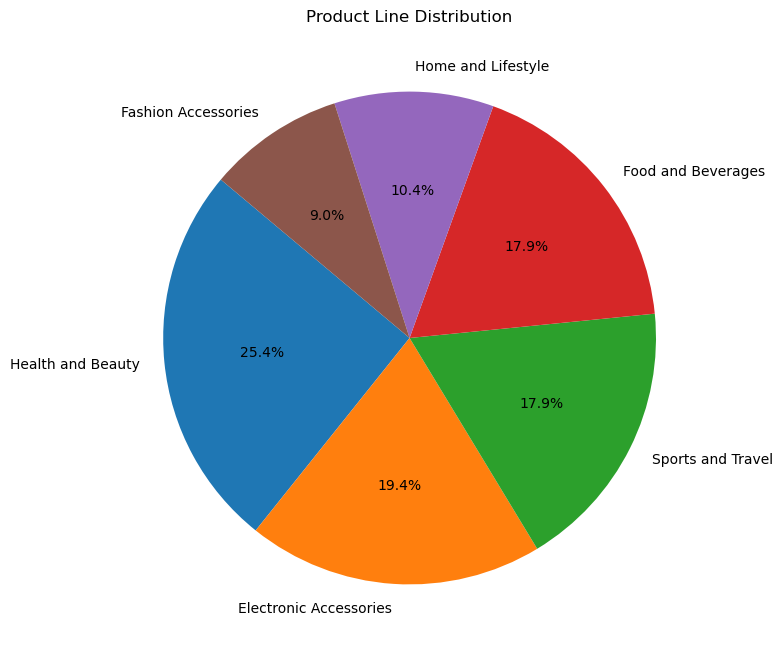

In [180]:
import matplotlib.pyplot as plt
# Assuming 'Product line' is a column in your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame
# Calculate the distribution of product lines
product_line_distribution = df2['Product line'].value_counts()
# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_line_distribution, labels=product_line_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Line Distribution')
plt.show()

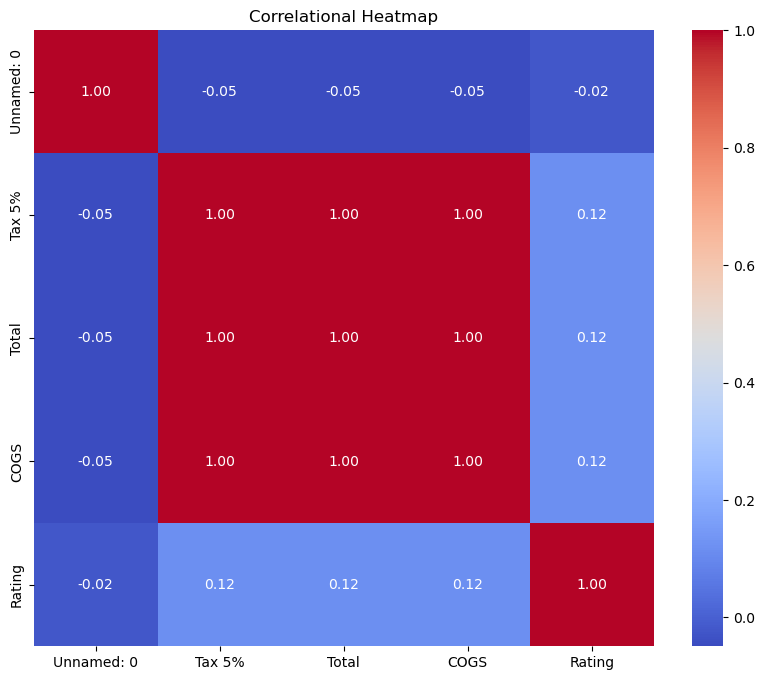

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'your_dataframe' is the name of your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

# Selecting only numerical columns for the correlation matrix
numerical_columns = df2.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlational heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlational Heatmap')
plt.show()


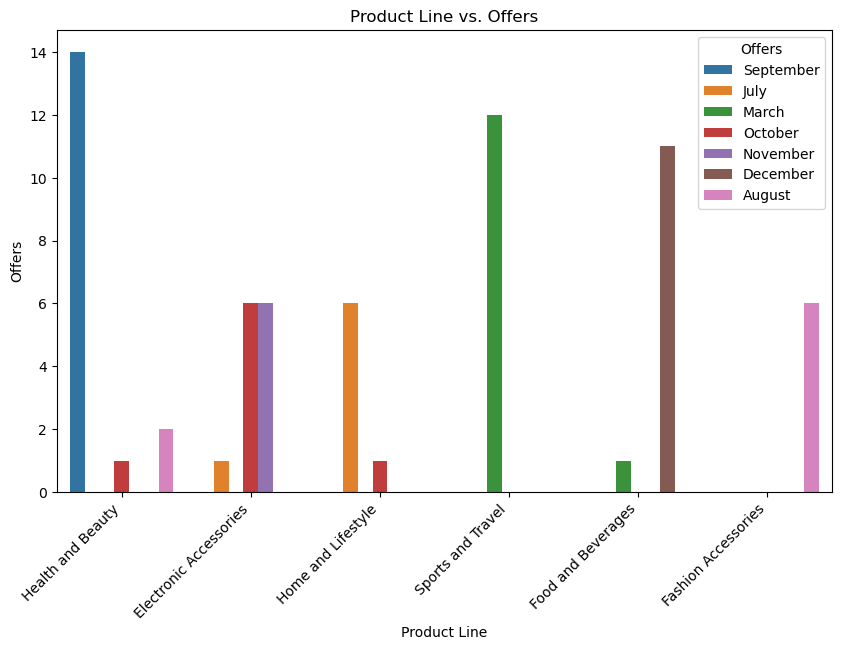

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Product line' and 'Offers' are columns in your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

plt.figure(figsize=(10, 6))
sns.countplot(x='Product line', hue='Offers', data=df2)
plt.title('Product Line vs. Offers')
plt.xlabel('Product Line')
plt.ylabel('Offers')
plt.legend(title='Offers')
plt.xticks(rotation=45, ha='right') 
plt.show()


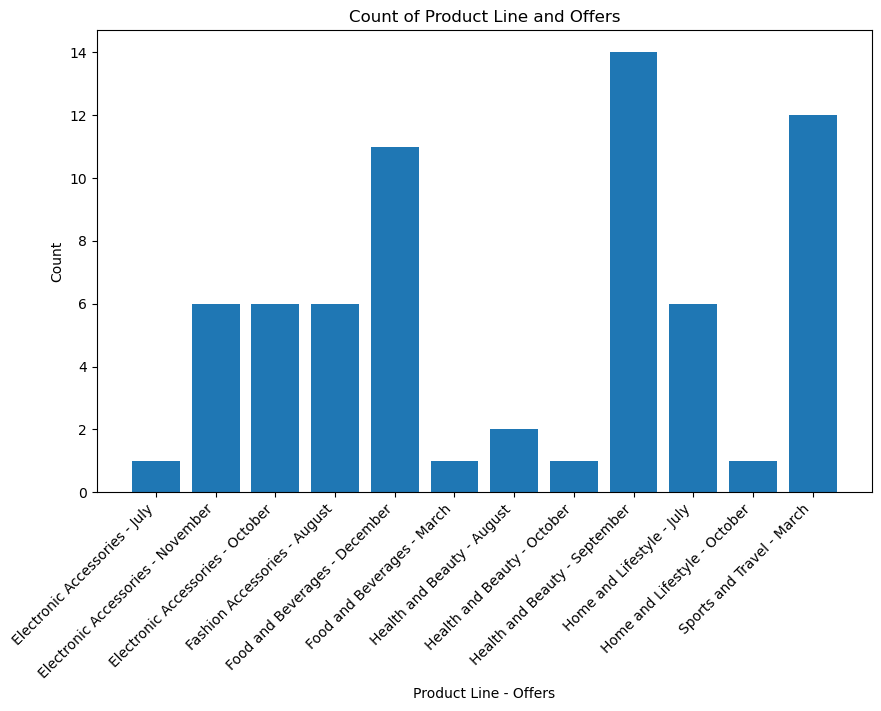

In [188]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Product line' and 'Offers' are columns in your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

# Creating a DataFrame with counts for each unique combination of 'Product line' and 'Offers'
data_counts = df2.groupby(['Product line', 'Offers']).size().reset_index(name='Count')

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x=range(len(data_counts)), height=data_counts['Count'], tick_label=data_counts['Product line'] + ' - ' + data_counts['Offers'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Count of Product Line and Offers')
plt.xlabel('Product Line - Offers')
plt.ylabel('Count')
plt.show()


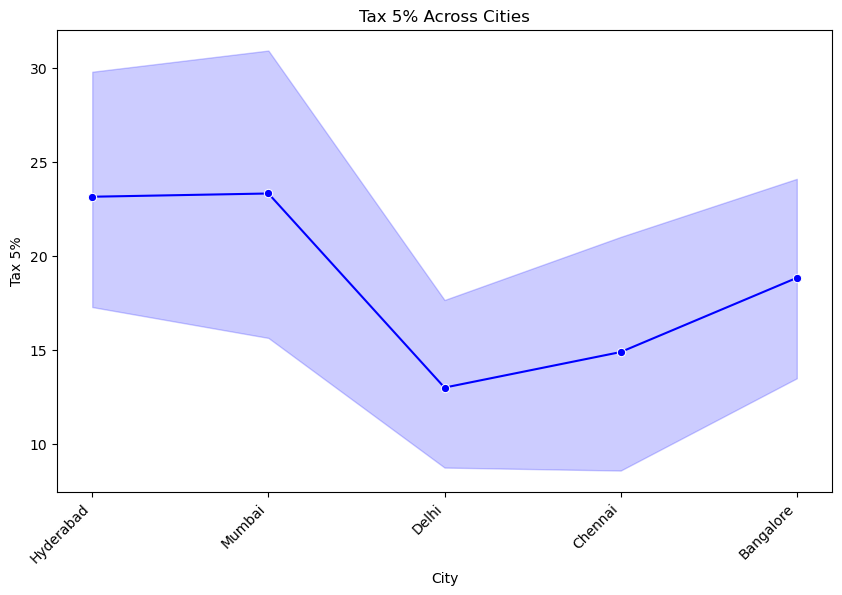

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'City' and 'Tax 5%' are columns in your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='City', y='Tax 5%', data=df2, marker='o', color='b')
plt.title('Tax 5% Across Cities')
plt.xlabel('City')
plt.ylabel('Tax 5%')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


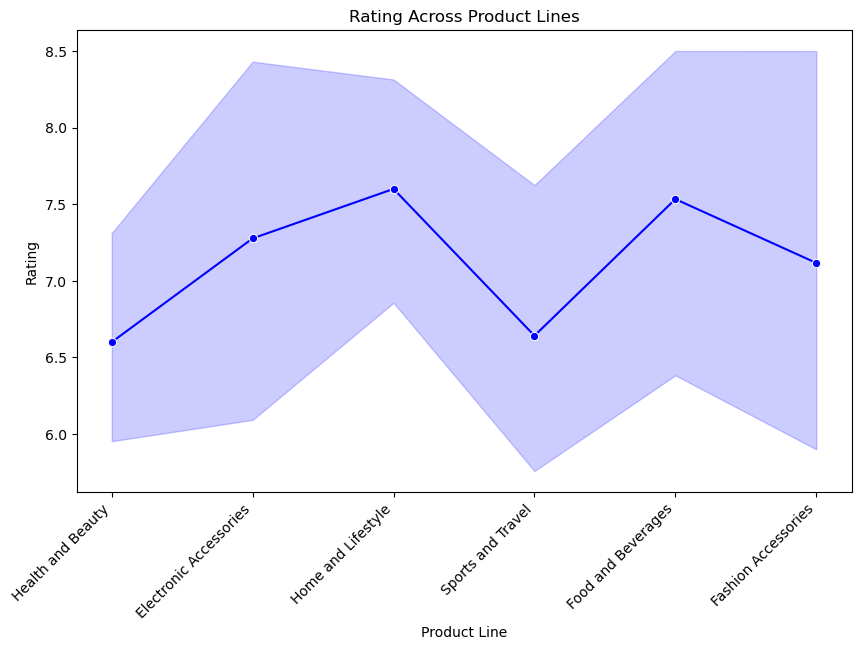

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Product line' and 'Rating' are columns in your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Product line', y='Rating', data=df2, marker='o', color='b')
plt.title('Rating Across Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
